# **Traffic and Mobile Speed Camera Offences in the Australia Capital Territory**

### **Summary of Contents**



1. **Introduction**
2. **Cleaning Data**
3. **Merging Data**
4. **Analysis**
5. **Conclusion and Discussion**
6. **Future Analysis**
7. **References**



# **1. Introduction**

It is well known that accidents and negligent driving is a leading cause of death. It is obvious why many authorities around the world invest resources into the enforcement of traffic. Speed cameras of various kinds have been around in Australia ever since the technology has permitted it, however in recent times, mobile speed cameras have also been introduced. Mobile speed cameras operate similar to static speed cameras, however have the ability to be placed adjacent to any road, and also the ability to move anywhere on demand.

The use of mobile speed cameras has been controversial, with many claiming that enforcement authorities strategically place them in specific locations with the main intention of raising revenue, despite numerous studies proving the effectiveness of them in reducing the road toll (Tay 2010, pp. 248). Static cameras, on the other hand, are well-known to be placed in high-traffic areas, or roads or intersections with higher rates of traffic incidents. Tay (2017 pp. 254) in his research, found that with an increasing number of speed camera operating hours per month, as well as the number of drivers penalised, there were statistically significant effects in the reduction of traffic incidents. This means that there is solid evidence for authorities to continue increase the demand for mobile speed camera enforcement.

This analysis uses data sources provided by the ACT Government aiming to better understand the number of traffic offences, and the use of mobile speed camera as well as other types of camera in Canberra, in Australian Capital Territory.

It aims to provide further insight to those who believe that mobile speed cameras are mainly for raising revenue. A newspaper article reported that in a recent survey, 61 per cent of Canberrans believe that the main purpose of mobile speed cameras is to raise revenue (Mannheim 2021). The news article already debunks this myth by providing a scatter chart defining the number of hours deployed at site against the number of fines per hour. It shows that because there is no clear correlation between these two variables, mobile speed camera locations are chosen using a strategy other than raising revenue. If the strategy were truly about raising revenue, we would see a clear linear relationship between the two variables.

You can see the chart [here](https://www.abc.net.au/news/2021-04-05/act-speed-cameras-as-revenue-raisers/100037994).

I found this chart and analysis particularly interesting, and wanted to see if I could provide any further insight into the use of mobile speed cameras in city that I live in.

Having grown up in Sydney for most of my life, and moving to Canberra in recent times, I have lived with a slight level of paranoia, every time I get into my car. The reason for this is because the fines issued for any traffic offence in most places in Australia is extraordinarily higher than other countries, even if it is a minor offence (such as parking fines). Nevertheless, sitting at a red-light and witnessing a reckless driver speed through a red-light only to see a bright white flash behind them always induces a smirk. Although I consider myself to generally be a safe and attentive driver, I have been issued a fine once. I personally believe that the high penalties in Australia are a strong deterrant to dangerous driving, and should not be decreased even if there is public outcry.

## **Questions**
* In 2016 - 2020, what kind of offence is caught most frequently by cameras?
* Has revenue generated by each type of offence increased between 2016 and 2020?
* Are offences seasonal? Is there a similar pattern in total number of offences throughout each year?
* Are the total number of fines and penalties from cameras increasing over time? Is there a difference between mobile speed cameras and other types?
* Is the use of mobile speed cameras increasing over time?
* Are mobile speed cameras placed in some locations more than others?

## **Files**
**Traffic_camera_offences_and_fines_2016.csv**

File obtained from ACT Government Open data (ACT Government, 2021). The original datafile contains data starting from 2010. I have modified this dataset by removing all cases from 2010 to 2015 by using Excel, and selecting all rows in Column A that were within these years and deleting them. I did this so that the dataset could fit within the 20MB size limit of the **ed** platform. In addition, although 2010 to 2015 data may have proven useful to answering question 1 and question 5 of the analysis, it is not absolutely necessary.

Each row contains the number of offences caught by the one camera, on each month.

The main data columns required in this data set are:

* Offence_Month (Contains the month and year for row line of offence)
* Camera_Type 
* Offence_Desc (The type of offence)
* Sum_Pen_Amt (The sum of the penalties in dollars)
    * Is calculated by penalty amount times the number of offences
* Sum_Inf_Count (The number of offences for each row of offence)

The **Sum_With_Amt** and **Sum_With_Count** columns show the value, and number of penalties that have been withdrawn, and are separate from the offences contained within the **Sum_Pen_Amt** and **Sum_Inf_Count** columns. Therefore, they are not important to this analysis.

**Traffic_speed_camera_locations.csv**

File obtained from ACT Government Open data (ACT Government, 2021).

Each row contains the latitude and longitude, as well as further description of where the camera is located, as well as a code variable which uniquely defines each camera. There's also a camera type variable.

The main data columns required in this data set are:

* CAMERA TYPE
* CAMERA LOCATION CODE
* LOCATION_CODE 
* LATITUDE 
* LONGTITUDE 
* LOCATION DESCRIPTION

**Mobile_Speed_Camera_Visits_and_Stays.csv**

File obtained from ACT Government Open data (ACT Government, 2021).

Each row contains information on a mobile speed camera visit, the time in hours spent at that particular location, the date, description of the site, the number of cars checked, the highest speed, average speed and the speed limit posted.

The main data columns required in this data set are:

* Date 
* TimeAtSiteInHours 
* Description of Site 
* Camera Location 

**ACT_District.zip**

File obtained from ACT Government Open data shapefile download site (ACT Government, 2021).

The raw shapefile download contains various boundaries and classifications that are not necessary for this analysis, leading it to be over 200mb in size. Given that I only needed the district boundaries and no other classifications, I extracted only the required shapefiles and created a new zip file to upload onto ed. 

The required classification defines the various districts that make-up the Australian Capital Territory, Canberra.

This data is used to create a map chart to answer question 6.

# **2. Cleaning Data**


In [89]:
# importing required modules and functions
import pandas as pd
from numpy import where
from numpy import array
from numpy import polyfit
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

%matplotlib inline

In [90]:
# importing dataframes
offences = pd.read_csv("Traffic_camera_offences_and_fines_2016.csv")
locations = pd.read_csv("Traffic_speed_camera_locations.csv")
msc_loc = pd.read_csv("Mobile_Speed_Camera_Visits_and_Stays.csv")

## **Offences**
Let's inspect the first dataframe - **offences**.

In [91]:
print(offences.columns)
print(offences.shape)
offences


Index(['Offence_Month', 'Rego_State', 'Clt_Catg', 'Camera_Type',
       'Location_Code', 'Location_Desc', 'Offence_Desc', 'Sum_Pen_Amt',
       'Sum_Inf_Count', 'Sum_With_Amt', 'Sum_With_Count'],
      dtype='object')
(67599, 11)


,Offence_Month,Rego_State,Clt_Catg,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count,Sum_With_Amt,Sum_With_Count
0,1/01/2016 0:00,ACT,OTHER PRSN,MOBILE SPEED CAMERA,73,MUGGA LANE,Non-School Zone Exceed Speed Limit <= 15 Km/H,236.0,1,0.0,0
1,1/01/2016 0:00,ACT,Diplomatic,MOBILE SPEED CAMERA,1,ADELAIDE AVENUE,Non-School Zone Exceed Speed Limit > 15 But <=...,352.0,1,0.0,0
2,1/01/2016 0:00,ACT,Diplomatic,MOBILE SPEED CAMERA,1,ADELAIDE AVENUE,Non-School Zone Exceed Speed Limit <= 15 Km/H,1020.0,1,0.0,0
3,1/01/2016 0:00,ACT,Diplomatic,MOBILE SPEED CAMERA,55,ATHLLON DRIVE,Non-School Zone Exceed Speed Limit <= 15 Km/H,0.0,0,157.0,1
4,1/01/2016 0:00,ACT,Diplomatic,MOBILE SPEED CAMERA,22,NORTHBOURNE AVENUE,Non-School Zone Exceed Speed Limit <= 15 Km/H,236.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
67594,6/01/2021 0:00,WA,OTHER PRSN,MOBILE SPEED CAMERA,3000,COLLEGE STREET - RADFORD COLLEGE,20 School Zone Exceed Speed Limit By > 15 But ...,477.0,1,0.0,0
67595,6/01/2021 0:00,WA,OTHER PRSN,MOBILE SPEED CAMERA,3006,BRIGALOW STREET - LYNEHAM PRIMARY SCHOOL,20 School Zone Exceed Speed Limit By <= 15 Km/H,321.0,1,0.0,0
67596,6/01/2021 0:00,WA,OTHER PRSN,MOBILE SPEED CAMERA,3036,PHILLIP AVE DICKSON COLLEGE,20 School Zone Exceed Speed Limit By <= 15 Km/H,321.0,1,0.0,0
67597,6/01/2021 0:00,WA,OTHER PRSN,MOBILE SPEED CAMERA,3014,JERRABOMBERRA AVE NARRABUNDAH COLLEGE,20 School Zone Exceed Speed Limit By <= 15 Km/H,321.0,1,0.0,0


The data looks pretty good.

Let's get rid of the columns that we don't require in this analysis.

In [92]:
offences = offences.drop(['Rego_State','Clt_Catg','Sum_With_Amt','Sum_With_Count'], axis = 1)
offences

,Offence_Month,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count
0,1/01/2016 0:00,MOBILE SPEED CAMERA,73,MUGGA LANE,Non-School Zone Exceed Speed Limit <= 15 Km/H,236.0,1
1,1/01/2016 0:00,MOBILE SPEED CAMERA,1,ADELAIDE AVENUE,Non-School Zone Exceed Speed Limit > 15 But <=...,352.0,1
2,1/01/2016 0:00,MOBILE SPEED CAMERA,1,ADELAIDE AVENUE,Non-School Zone Exceed Speed Limit <= 15 Km/H,1020.0,1
3,1/01/2016 0:00,MOBILE SPEED CAMERA,55,ATHLLON DRIVE,Non-School Zone Exceed Speed Limit <= 15 Km/H,0.0,0
4,1/01/2016 0:00,MOBILE SPEED CAMERA,22,NORTHBOURNE AVENUE,Non-School Zone Exceed Speed Limit <= 15 Km/H,236.0,1
...,...,...,...,...,...,...,...
67594,6/01/2021 0:00,MOBILE SPEED CAMERA,3000,COLLEGE STREET - RADFORD COLLEGE,20 School Zone Exceed Speed Limit By > 15 But ...,477.0,1
67595,6/01/2021 0:00,MOBILE SPEED CAMERA,3006,BRIGALOW STREET - LYNEHAM PRIMARY SCHOOL,20 School Zone Exceed Speed Limit By <= 15 Km/H,321.0,1
67596,6/01/2021 0:00,MOBILE SPEED CAMERA,3036,PHILLIP AVE DICKSON COLLEGE,20 School Zone Exceed Speed Limit By <= 15 Km/H,321.0,1
67597,6/01/2021 0:00,MOBILE SPEED CAMERA,3014,JERRABOMBERRA AVE NARRABUNDAH COLLEGE,20 School Zone Exceed Speed Limit By <= 15 Km/H,321.0,1


Let's inspect those rows with missing values.

In [93]:
# locate index of rows which have missing values.
offences[offences.isnull().any(axis=1)]

,Offence_Month,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count
254,1/01/2016 0:00,RED LIGHT AND SPEED CAMERA,1024,CANBERRA AVENUE/CAPTAIN COOK CRESCENT/MANUKA C...,Non-School Zone Exceed Speed Limit <= 15 Km/H,NaN,1
426,1/01/2016 0:00,RED LIGHT AND SPEED CAMERA,1022,HINDMARSH DRIVE/BALL STREET,Non-School Zone Exceed Speed Limit <= 15 Km/H,NaN,1
555,1/01/2016 0:00,FIXED ONLY SPEED CAMERA,1027,BARTON HIGHWAY BETWEEN GUNGAHLIN DRIVE AND ELL...,Non-School Zone Exceed Speed Limit By > 30 But...,NaN,1
558,1/01/2016 0:00,RED LIGHT AND SPEED CAMERA,1006,NORTHBOURNE AVENUE/ANTILL STREET/MOUAT STREET,Non-School Zone Exceed Speed Limit <= 15 Km/H,NaN,1
559,1/01/2016 0:00,FIXED ONLY SPEED CAMERA,1030,FEDERAL HIGHWAY BETWEEN ZELLING STREET AND ANT...,Non-School Zone Exceed Speed Limit By > 30 But...,NaN,1
...,...,...,...,...,...,...,...
67387,6/01/2021 0:00,MOBILE SPEED CAMERA,55,ATHLLON DRIVE,20 Non-school zone exceed speed limit by <= 15...,NaN,1
67394,6/01/2021 0:00,RED LIGHT AND SPEED CAMERA,1004,DRAKEFORD DRIVE/BODDINGTON CRESCENT/MARCONI CR...,20 Non-school zone exceed speed limit by <= 15...,NaN,1
67395,6/01/2021 0:00,RED LIGHT AND SPEED CAMERA,1007,GINNINDERRA DRIVE/AIKMAN DRIVE,20 Non-school zone exceed speed limit by <= 15...,NaN,1
67399,6/01/2021 0:00,FIXED ONLY SPEED CAMERA,1026,BARTON HIGHWAY BETWEEN CURRAN DRIVE AND GOLD C...,20 Non-school zone exceed speed limit by <= 15...,NaN,1


There are 535 rows with missing values. According to the above table, it appears to be only in the 5th column, containing the cost of the penalty.

Let's check it to make sure.

In [94]:
# show the unique column indexes of cells which contain missing values.
set(where(pd.isnull(offences))[1].tolist())

{5}

Correct. The only missing values are in the 5th column, **Sum_Pen_Amt**.

Here we have to decide what to do with the missing values. We can either remove them from the dataset, or change them.

Given that 535 cases is a small number compared to how many cases there are in the dataset, I'm inclined to remove them. However, only if these rows don't contain a vast number of individual penalties within them. 

Let's first inspect how many penalties each of the missing rows contain.

In [95]:
# use the located rows index to select the rows in the offences dataframe with missing values
missing = where(pd.isnull(offences))[0].tolist()

# sum up the total number of offences in the Sum_Inf_Count
print(sum(offences.iloc[missing,:]['Sum_Inf_Count'].tolist()))

594


There are 594 individual offences contained within the missing rows. That's not a whole lot more than the 535 rows.

I'm happy to remove them from the dataset.

In [96]:
# remove missing rows from the offences dataset
missing_row_index = where(pd.isnull(offences))[0].tolist()
    
offences = offences.drop(missing_row_index)

print(offences.shape)

(67064, 7)


Cool, it looks like 535 rows have been removed.

Let's move onto the description of the offence, in the **Offence_Desc** column.

The codes in this column look very messy. To answer question 2, it would be a lot easier to condense the types of offences into a smaller number of different type of offences, and also shorten their names.

Let's inspect the unique offence descriptions in the column.

In [97]:
offences['Offence_Desc'].value_counts()

Non-School Zone Exceed Speed Limit <= 15 Km/H                               14144
Non-school zone exceed speed limit by <= 15km/h                             10600
20 Non-school zone exceed speed limit by <= 15km/h                          10068
Non-School Zone Exceed Speed Limit > 15 But <= 30 Km/H                       7985
School Zone  Exceed Speed Limit By <= 15 Km/H                                5554
20 School Zone  Exceed Speed Limit By <= 15 Km/H                             3295
20 Non-School Zone Exceed Speed Limit > 15 But <= 30 Km/H                    3291
Enter Intersection or Marked Foot Crossing When Traffic Light Red            2485
Non-School Zone Exceed Speed Limit By > 30 But <= 45 Km/H                    1835
School Zone Exceed Speed Limit By > 15 But <= 30 Km/H                        1640
Non-School Zone Exceed Speed Limit By > 45 Km/H                              1221
59 (1) Enter Intersection or Marked Foot Crossing When Traffic Light Red     1105
20 Non-School Zo

Wow, there are a lot of different descriptions, and a lot overlap in the same offence.

We can change these descriptions into the following descriptions:

* Speeding <= 15 km/h
* Speeding 16 - 30 km/h
* Speeding 31 - 45 km/h
* Speeding 46+ km/h
* Red Light Offence 

In [98]:
# Changing offence descriptions.

# removing cluttered leading strings
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('20 ','')
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('59 \(1\) ','', regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('60 ','')

# replacing each categorical string with new descriptions
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Non-School Zone Exceed Speed Limit <= 15 Km/H','Speeding <= 15 km/h')
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Non-school zone exceed speed limit by <= 15km/h','Speeding <= 15 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Non-School Zone Exceed Speed Limit > 15 But <= 30 Km/H','Speeding 16 - 30 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('School Zone  Exceed Speed Limit By <= 15 Km/H','Speeding <= 15 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Enter Intersection or Marked Foot Crossing When Traffic Light Red','Red Light Offence',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Non-School Zone Exceed Speed Limit By > 30 But <= 45 Km/H','Speeding 31 - 45 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('School Zone Exceed Speed Limit By > 15 But <= 30 Km/H','Speeding 16 - 30 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Non-School Zone Exceed Speed Limit By > 45 Km/H','Speeding 46+ km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Enter Intersection or Marked Foot Crossing When Traffic Arrow Red','Red Light Offence',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Proceed When Traffic Light Red','Red Light Offence',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('School Zone Exceed Speed Limit By > 30 But <= 45 Km/H','Speeding 31 - 45 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Proceed When Traffic Arrow Red','Red Light Offence',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed-\(80kph Limit\)-95kph To 109kph','Speeding 16 - 30 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('School Zone Exceed Speed Limit By > 45 Km/H','Speeding 46+ km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed-\(80kph Limit\)-81kph To 94kph','Speeding <= 15 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed-\(60kph Limit\)-75kph To 89kph','Speeding 16 - 30 km/h',regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed-\(60kph Limit\)-61kph To 74kph','Speeding <= 15 km/h', regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed-\(70kph Limit\)-85kph To 99kph','Speeding 16 - 30 km/h', regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed 90 Zone 105-119 Kph','Speeding 16 - 30 km/h', regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Speed-\(70kph Limit\)-71kph To 84kph','Speeding <= 15 km/h', regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Enter Intersection When Traffic Arrow Red','Red Light Offence', regex = True)
offences['Offence_Desc'] = offences['Offence_Desc'].str.replace('Enter Intersection When Traffic Light Red','Red Light Offence', regex = True)

# checking new categories
offences['Offence_Desc'].value_counts()

Speeding <= 15 km/h      43669
Speeding 16 - 30 km/h    13789
Red Light Offence         4835
Speeding 31 - 45 km/h     2901
Speeding 46+ km/h         1870
Name: Offence_Desc, dtype: int64

Great, we've cleaned up the categories. 

**NOTE:** Speeding penalty for similar speeds in non-school zone and school zones are different in Australia. However, for the purposes of simplifying this analysis, I have combined them into the same codeframe.

Let's have a look at the Date variable now **Offence_Month**.

In [99]:
offences['Offence_Month']

offences['Offence_Month'].value_counts()

2/01/2019 0:00     2008
4/01/2021 0:00     1882
5/01/2018 0:00     1327
8/01/2018 0:00     1184
11/01/2019 0:00    1180
                   ... 
6/01/2016 0:00      792
5/01/2016 0:00      773
4/01/2016 0:00      715
2/01/2016 0:00      676
1/01/2016 0:00      569
Name: Offence_Month, Length: 66, dtype: int64

It looks like we only have monthly data. The 'day' is not included and has been formatted to automatically assume the 1st. The dataset also does not contain hours and minutes of the day, let's remove these parts.

In [100]:
# removing time string.
offences['Offence_Month'] = offences['Offence_Month'].str.replace(' 0:00','')

# converting to datetime type, noting that the original data has the order or month - day - year
offences['Offence_Month'] = pd.to_datetime(offences['Offence_Month'],format = '%m/%d/%Y')

offences.sort_values('Offence_Month')

,Offence_Month,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count
0,2016-01-01,MOBILE SPEED CAMERA,73,MUGGA LANE,Speeding <= 15 km/h,236.0,1
389,2016-01-01,FIXED ONLY SPEED CAMERA,1031,FEDERAL HIGHWAY BETWEEN ANTILL STREET AND MAJU...,Speeding <= 15 km/h,11328.0,48
388,2016-01-01,FIXED ONLY SPEED CAMERA,1028,MONARO HIGHWAY BETWEEN LANYON DRIVE AND SHEPPA...,Speeding <= 15 km/h,24072.0,102
387,2016-01-01,RED LIGHT AND SPEED CAMERA,1021,HINDMARSH DRIVE/YAMBA DRIVE,Speeding <= 15 km/h,1652.0,7
386,2016-01-01,RED LIGHT AND SPEED CAMERA,1020,BARRY DRIVE/MARCUS CLARKE STREET,Speeding <= 15 km/h,708.0,3
...,...,...,...,...,...,...,...
66930,2021-06-01,MOBILE SPEED CAMERA,200,BALDWIN DRIVE,Speeding <= 15 km/h,5940.0,20
66931,2021-06-01,MOBILE SPEED CAMERA,3018,LAUNCESTON STREET CANBERRA COLLEGE,Speeding <= 15 km/h,28890.0,90
66932,2021-06-01,MOBILE SPEED CAMERA,3030,KELLEWAY AVE GOLD CREEK HIGH,Speeding <= 15 km/h,6420.0,20
66919,2021-06-01,MOBILE SPEED CAMERA,61,BARTON HIGHWAY,Speeding 16 - 30 km/h,3066.0,7


Let's remove all rows with 2021 data as it is incomplete.

In [101]:
# selecting all rows with 2021 data and dropping them
rows_2021 = offences[offences['Offence_Month'].dt.year == 2021].index

offences = offences.drop(rows_2021)

Finally, let's remove the '01' representing day, as it is unnecessary.

In [102]:
# removing the '01' day from the values.
offences['Offence_Month'] = offences['Offence_Month'].apply(lambda x: x.strftime('%Y-%m'))

## **Locations**

Let's inspect our second dataset - **locations**.

In [103]:
print(locations.columns)
print(locations.shape)
locations

Index(['CAMERA TYPE', 'CAMERA LOCATION CODE', 'LOCATION_CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION DESCRIPTION', 'Location',
       'Decommissioned Camera_Date'],
      dtype='object')
(1222, 8)


,CAMERA TYPE,CAMERA LOCATION CODE,LOCATION_CODE,LATITUDE,LONGITUDE,LOCATION DESCRIPTION,Location,Decommissioned Camera_Date
0,MOBILE SPEED CAMERA,0286,0286A,-35.319037,149.139831,6 Eyre Street Kingston ACT 2604 Australia,"(-35.319037, 149.139831)",NaN
1,RED LIGHT AND SPEED CAMERA,1002,1002,-35.276100,149.129480,NORTHBOURNE AVENUE/BARRY DRIVE/COOYONG STREET,"(-35.2761, 149.12948)",NaN
2,MOBILE SPEED CAMERA,3072,3072A,-35.394284,149.096534,Langdon Ave Wanniassa ACT 2903 Australia,"(-35.394284, 149.096534)",NaN
3,RED LIGHT AND SPEED CAMERA,1006,1006,-35.247830,149.134120,NORTHBOURNE AVENUE/ANTILL STREET/MOUAT STREET,"(-35.24783, 149.13412)",NaN
4,MOBILE SPEED CAMERA,0283,0283B,-35.361179,149.077721,80 Macfarland Crescent Chifley ACT 2606 Australia,"(-35.361179, 149.077721)",NaN
...,...,...,...,...,...,...,...,...
1217,MOBILE SPEED CAMERA,0013C,0013C,-35.344570,149.149730,"Hindmarsh Dr, Symonston ACT 2609, Australia","(-35.34457, 149.14973)",NaN
1218,MOBILE SPEED CAMERA,0006E,0006E,-35.274840,149.046660,"400 Coppins Crossing Rd, Molonglo Valley ACT 2...","(-35.27484, 149.04666)",NaN
1219,MOBILE SPEED CAMERA,0264A,0264A,-35.350530,149.049679,"23 Fremantle Dr, Stirling ACT 2611, Australia","(-35.35053, 149.049679)",NaN
1220,MOBILE SPEED CAMERA,4006B,4006B,-35.206275,149.089757,"Gundaroo Drive, Giralang ACT","(-35.206275, 149.089757)",NaN


It looks like the **CAMERA LOCATION CODE** and **LOCATION_CODE** column are similar, however we will keep both in case they come in handy when we merge the datasets.

We can remove the **Location** column as it simply contains the latitude and longitude, which are already in other columns. The location description may come in handy in case the location codes do not match up properly when merging with the other datafiles.

We do not need the **Decommissioned Camera_Date** column so let's remove it.

In [104]:
locations = locations.drop(['Location','Decommissioned Camera_Date'], axis = 1)

We'll need to check for missing values as well.

In [105]:
# locate index of rows which have missing values.
locations[locations.isnull().any(axis=1)]

,CAMERA TYPE,CAMERA LOCATION CODE,LOCATION_CODE,LATITUDE,LONGITUDE,LOCATION DESCRIPTION
43,MOBILE SPEED CAMERA,311,0311A,-35.24946,149.066222,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN
61,FIXED ONLY SPEED CAMERA,1026S,NaN,-35.19198,149.083270,BARTON HIGHWAY BETWEEN CURRAN DRIVE AND GOLD C...
76,NaN,NaN,NaN,NaN,NaN,NaN
225,FIXED ONLY SPEED CAMERA,1032S,NaN,-35.34168,149.163271,MONARO HIGHWAY NEAR HINDMARSH DRIVE OVERPASS
662,FIXED ONLY SPEED CAMERA,1033S,NaN,-35.34768,149.069651,TUGGERANONG PARKWAY NEAR HINDMARSH DRIVE UNDER...


There are only 8 rows of missing data.

We can remove row 48,49,51 and 76 as they are empty rows. 

Row 61, 225 and 662 look to contain some data, with missing values in the **LOCATION_CODE** column, but has a code in the **CAMERA LOCATION CODE** column. Let's keep these rows.

In [106]:
locations = locations.drop([48,49,51,76])

## **Mobile Speed Camera Locations**
Let's inspect our third dataset - **msc_loc**.

In [107]:
print(msc_loc.columns)
print(msc_loc.shape)
msc_loc

Index(['Date', 'TimeAtSiteInHours', 'Description of Site', 'Camera Location',
       'Street', 'Number Checked', 'Highest Speed', 'Average Speed',
       'Posted Speed'],
      dtype='object')
(45505, 9)


,Date,TimeAtSiteInHours,Description of Site,Camera Location,Street,Number Checked,Highest Speed,Average Speed,Posted Speed
0,1/07/2016,1.23,5 km north of Randwick Road/Barton Highway int...,4000,Barton Highway / William Slim Drive Roundabout...,570.0,87.0,74.0,60.0
1,1/07/2016,1.42,"750 metres south of Kings Avenue overpass, on ...",0005A,Bowen Drive,447.0,0.0,0.0,60.0
2,1/07/2016,1.25,1.15km north of Lanyon Drive intersection on t...,0020S,Monaro Highway,4247.0,92.0,90.0,80.0
3,1/07/2016,1.10,200 metres south of Beasley Street intersectio...,0027E,Yamba Drive,680.0,0.0,0.0,80.0
4,1/07/2016,1.02,Opposite No: 149 Clive Steele Avenue on the na...,0049B,Clive Steele Avenue,182.0,0.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...
45500,15/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,303.0,0.0,0.0,40.0
45501,1/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,342.0,0.0,0.0,40.0
45502,17/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,514.0,0.0,0.0,40.0
45503,21/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,322.0,0.0,0.0,40.0


The data looks quite good at first glance, however it looks like the rows aren't organised in date order. We'll handle that later after we convert the date into datetime objects, but let's start by removing the columns we don't need.

In [108]:
# remove columns by column index
msc_loc = msc_loc.drop(msc_loc.columns[5:9],axis = 1)
msc_loc

,Date,TimeAtSiteInHours,Description of Site,Camera Location,Street
0,1/07/2016,1.23,5 km north of Randwick Road/Barton Highway int...,4000,Barton Highway / William Slim Drive Roundabout...
1,1/07/2016,1.42,"750 metres south of Kings Avenue overpass, on ...",0005A,Bowen Drive
2,1/07/2016,1.25,1.15km north of Lanyon Drive intersection on t...,0020S,Monaro Highway
3,1/07/2016,1.10,200 metres south of Beasley Street intersectio...,0027E,Yamba Drive
4,1/07/2016,1.02,Opposite No: 149 Clive Steele Avenue on the na...,0049B,Clive Steele Avenue
...,...,...,...,...,...
45500,15/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street
45501,1/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street
45502,17/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street
45503,21/06/2021,1.33,Adjacent to 23 Starke Street,3078A,Starke Street


Once again, let's look for missing data.

In [109]:
# locate index of rows which have missing values.
msc_loc[msc_loc.isnull().any(axis=1)]

,Date,TimeAtSiteInHours,Description of Site,Camera Location,Street
39,6/11/2020,NaN,NaN,NaN,NaN
22617,3/08/2018,NaN,NaN,NaN,NaN
27326,4/02/2019,NaN,NaN,NaN,NaN
28942,21/08/2019,1.33,NaN,NaN,NaN
28943,NaN,1.33,900 metres West of Coranderrk Street & Parkes ...,0075I,Parkes Way
28982,16/08/2019,NaN,NaN,NaN,NaN
35897,12/03/2020,NaN,NaN,NaN,NaN
39497,8/09/2020,NaN,NaN,NaN,NaN


Although row **28942** and **28943** have some data in it, unfortunately we can't use them because they are missing other information.

We'll have to remove all these rows.

In [110]:
# get indexes of rows with missing data
missing_index = msc_loc[msc_loc.isnull().any(axis=1)].index

# remove rows with missing data from dataset
msc_loc = msc_loc.drop(missing_index)

# displaying dimensions
msc_loc.shape

(45497, 5)

Great. It looks like it worked properly as there are 8 less rows than the original data.

Let's handle the Date column now.



In [111]:
# converting to datetime type.
msc_loc['Date'] = pd.to_datetime(msc_loc['Date'],format = '%d/%m/%Y')

# sort by date
msc_loc.sort_values('Date')

# displaying data
msc_loc

,Date,TimeAtSiteInHours,Description of Site,Camera Location,Street
0,2016-07-01,1.23,5 km north of Randwick Road/Barton Highway int...,4000,Barton Highway / William Slim Drive Roundabout...
1,2016-07-01,1.42,"750 metres south of Kings Avenue overpass, on ...",0005A,Bowen Drive
2,2016-07-01,1.25,1.15km north of Lanyon Drive intersection on t...,0020S,Monaro Highway
3,2016-07-01,1.10,200 metres south of Beasley Street intersectio...,0027E,Yamba Drive
4,2016-07-01,1.02,Opposite No: 149 Clive Steele Avenue on the na...,0049B,Clive Steele Avenue
...,...,...,...,...,...
45500,2021-06-15,1.33,Adjacent to 23 Starke Street,3078A,Starke Street
45501,2021-06-01,1.33,Adjacent to 23 Starke Street,3078A,Starke Street
45502,2021-06-17,1.33,Adjacent to 23 Starke Street,3078A,Starke Street
45503,2021-06-21,1.33,Adjacent to 23 Starke Street,3078A,Starke Street


Now the dates are as a datetime object, and are also sorted in order, from oldest to newest.

# **3. Merging Data**

To answer question 6, we will need the **msc_loc** dataset to contain the latitude and longitude provided in the **locations** dataset.

Once this is done, we can forget about the **locations** dataset altogether, as it contains no further information that we can use to answers the questions in our analysis.


We can use the location code provided in both datasets to merge with.

Before we start, I would like to acknowledge that unfortunately the **offences** dataset has very messy **Location_Code** tags that do not exactly match up with the Location codes provided in the **locations** dataset, especially when it identifying exactly where mobile speed cameras are.

In [112]:
# sample to show how location codes are represented in the locations dataset
locations['LOCATION_CODE'].sample(10, random_state = 1)

314    0094D
85     3074A
199    0231D
139    3039A
345    0144C
608    0153D
780    0072O
795    0015J
208    0178K
206    0129B
Name: LOCATION_CODE, dtype: object

In [113]:
# sample to show how location codes are represented in the offences dataset
offences['Location_Code'].sample(10, random_state = 1)

49613     136
39585    3007
28179      20
46250    1026
12461      54
18964      53
20602    1008
45386      81
8438      102
36828    3035
Name: Location_Code, dtype: int64

The numbers used to represent the name of the street that the camera is located on, while the subsequent alphabetical character is used to differentiate the location on that street from other locations.

I would have loved to be able to attach all latitudes and longitudes to the **offences** dataset, however we aren't able to achieve an accurate match with the current state the datasets are in.

If it were possible, we would be able to map out all offences and provide insight into questions such as... 
* In which areas of Canberra are we seeing the most number of offences?

Luckily, the codes provided in the **msc_loc** dataset are a lot cleaner, and should match up with the codes provided in **locations**.

Let's start merging the two.

In [114]:
# create unique id in msc_loc to ensure merge does not duplicate rows when camera location is matching
msc_loc['unique_id'] = range(9999900, 9999900+len(msc_loc))

# correct cases with incorrect location IDs
msc_loc = msc_loc.replace('\\n','', regex=True) 
msc_loc = msc_loc.replace('\\r','', regex=True)
msc_loc['Camera Location'] = msc_loc['Camera Location'].str.replace('0094E0094e0094E0094E','0094E',regex = True) 
msc_loc['Camera Location'] = msc_loc['Camera Location'].str.replace('0001A0001A0001A','001A',regex = True)

# correct lowercase alphabetical characters
msc_loc['Camera Location'] = msc_loc['Camera Location'].str.upper()

# merge latitude and longitude to msc_loc to use in q6
msc_loc = msc_loc.merge(locations[['LOCATION_CODE','LATITUDE','LONGITUDE','LOCATION DESCRIPTION']], 
left_on = 'Camera Location', right_on = 'LOCATION_CODE', how = 'left').drop_duplicates('unique_id')

msc_loc

,Date,TimeAtSiteInHours,Description of Site,Camera Location,Street,unique_id,LOCATION_CODE,LATITUDE,LONGITUDE,LOCATION DESCRIPTION
0,2016-07-01,1.23,5 km north of Randwick Road/Barton Highway int...,4000,Barton Highway / William Slim Drive Roundabout...,9999900,4000,-35.202827,149.096463,"Barton Hwy, Crace ACT 2911, Australia"
1,2016-07-01,1.42,"750 metres south of Kings Avenue overpass, on ...",0005A,Bowen Drive,9999901,0005A,-35.308420,149.139100,"3-9 Bowen Dr, Barton ACT 2600, Australia"
2,2016-07-01,1.25,1.15km north of Lanyon Drive intersection on t...,0020S,Monaro Highway,9999902,0020S,-35.373660,149.168490,"Alexander Maconochie Centre, 10400 Monaro Hwy,..."
3,2016-07-01,1.10,200 metres south of Beasley Street intersectio...,0027E,Yamba Drive,9999903,0027E,-35.369730,149.109510,"Yamba Dr, Mawson ACT 2607, Australia"
4,2016-07-01,1.02,Opposite No: 149 Clive Steele Avenue on the na...,0049B,Clive Steele Avenue,9999904,0049B,-35.416870,149.085930,"154 Clive Steele Ave, Monash ACT 2904, Australia"
...,...,...,...,...,...,...,...,...,...,...
46452,2021-06-15,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,10045392,3078A,-35.225924,149.028609,"Starke Street, Higgins ACT"
46453,2021-06-01,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,10045393,3078A,-35.225924,149.028609,"Starke Street, Higgins ACT"
46454,2021-06-17,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,10045394,3078A,-35.225924,149.028609,"Starke Street, Higgins ACT"
46455,2021-06-21,1.33,Adjacent to 23 Starke Street,3078A,Starke Street,10045395,3078A,-35.225924,149.028609,"Starke Street, Higgins ACT"


Great, now that's merged, let's see if we find any missing data.

In [115]:
msc_loc[msc_loc.isnull().any(axis=1)]

,Date,TimeAtSiteInHours,Description of Site,Camera Location,Street,unique_id,LOCATION_CODE,LATITUDE,LONGITUDE,LOCATION DESCRIPTION
1406,2017-08-26,1.33,200 meters north of Isabella Drive roundabout ...,4005A,Ashley Drive (ROADWORKS),10001279,NaN,NaN,NaN,NaN
2692,2016-10-29,1.33,Adjacent to 72 Namatjira Drive,0037H,Namatjira Drive,10002534,NaN,NaN,NaN,NaN
2716,2016-10-30,1.33,Adjacent to 72 Namatjira Drive,0037H,Namatjira Drive,10002558,NaN,NaN,NaN,NaN
2836,2016-11-04,1.50,Adjacent to 72 Namatjira Drive,0037H,Namatjira Drive,10002676,NaN,NaN,NaN,NaN
2852,2016-11-05,1.33,Adjacent to 72 Namatjira Drive,0037H,Namatjira Drive,10002692,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46206,2021-06-22,1.50,Opposite 42 Eggleston Crescent,0292A,Eggleston Crescent,10045153,NaN,NaN,NaN,NaN
46212,2021-06-11,1.33,Adjacent to 39 Alpen Street.,0304A,Alpen Street,10045159,NaN,NaN,NaN,NaN
46213,2021-06-03,1.33,Adjacent to 36 Clancy Street.,0305A,Clancy Street,10045160,NaN,NaN,NaN,NaN
46406,2021-06-07,1.33,Opposite 219 Badimara Street.,3062A,Badimara Street,10045349,NaN,NaN,NaN,NaN


Unfortunately there are still 806 cases with missing Location descriptions.

There are several options that we can handle this, such as using the fuzzywuzzy module  and linking the descriptions in both datasets up. However, as I understand it, this is not available on the ed. platform.

We will have to keep in mind to ignore these NA cases in our analysis for question 6.

Now that we have our merged **msc_loc** dataset. We can begin our analysis.


# **4. Analysis**


## **Q1.** 
 **In 2016 - 2020, what kind of offence is caught most frequently by cameras?**

Despite our answer to this was already visible when we cleaned the data. It would be good to visualise in charts.

In [116]:
# selecting required columns in dataframe
offences_q1 = offences[['Offence_Desc','Sum_Inf_Count']]
offences_q1 = offences_q1.groupby('Offence_Desc').sum()

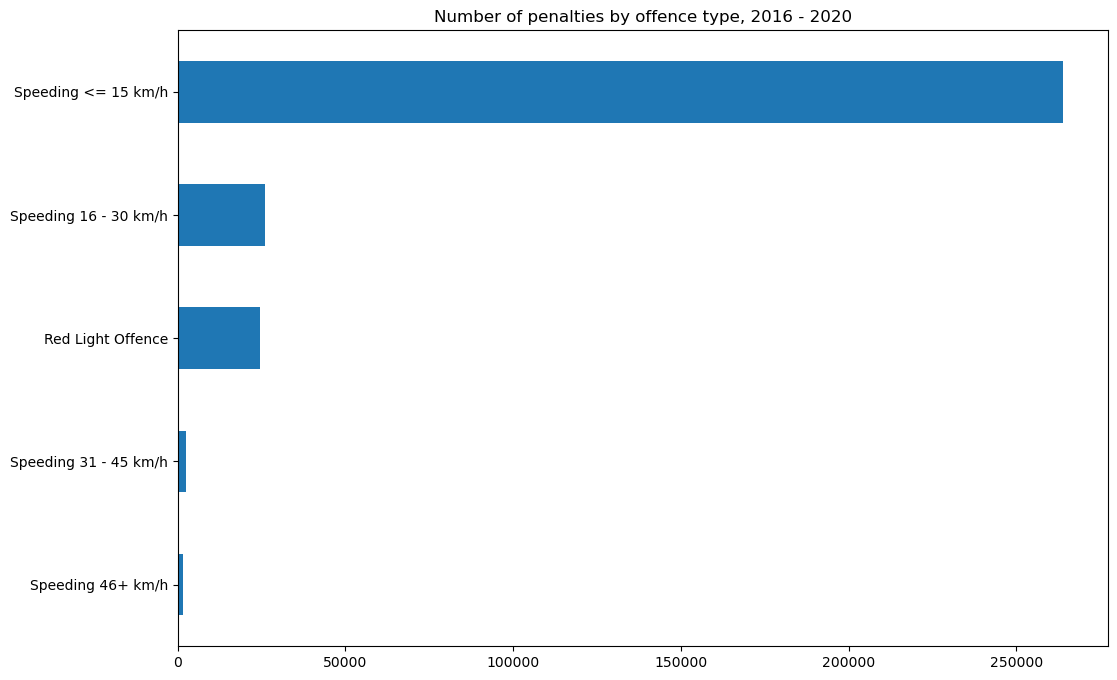

In [117]:
# preparing dataframe for first plot
offences_q1 = offences_q1.rename(columns = {'Sum_Inf_Count':'Number of penalties'})
offences_q1 = offences_q1.sort_values(by = 'Number of penalties',ascending = True)
offences_q1.plot(
    kind = 'barh',
    xlabel = '',
    title='Number of penalties by offence type, 2016 - 2020',
    legend = '',
    figsize = [12,8]
    
)

total_penalties = offences_q1['Number of penalties'].sum()
offences_q1['proportion'] = offences_q1['Number of penalties']/total_penalties

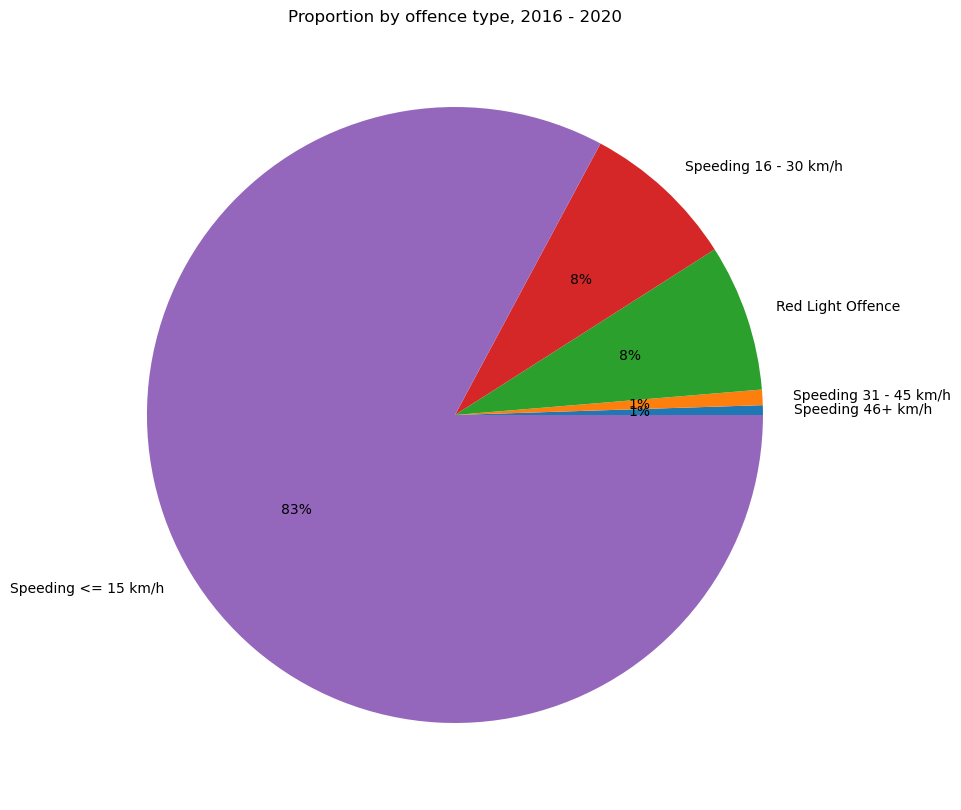

In [118]:
# preparing dataframe for 2nd plot by calculating the proportion of each offence
total_penalties = offences_q1['Number of penalties'].sum()
offences_q1['proportion'] = offences_q1['Number of penalties']/total_penalties

prop_q1 = offences_q1['proportion']
plt = prop_q1.plot(
    kind = 'pie',
    figsize = [15,10],
    title='Proportion by offence type, 2016 - 2020',
    autopct='%1.0f%%',
    ylabel = ''
)

 **Q1 Answer**

It comes as no surpise that the most common offence caught by cameras is low range speeding; below 15km/h than the posted speed limit. With over 250,000 penalties in 2016-2020, this made up 83% of all offences. 

## **Q2.**
**Has revenue generated by each type of offence increased between 2016 and 2020?**

We can answer this question by building a bar chart for each type of offence, with the year on the x-axis.

In [119]:
# selecting required columns in dataframe
offences_q2 = offences[['Offence_Month','Offence_Desc','Sum_Pen_Amt']]
# taking the month out of Date variable, to consolidate by year
offences_q2 = offences_q2.copy() # ensure chained assignment does not occur in next task
offences_q2['Year'] = offences['Offence_Month'].str[0:4]

# dropping original date column as it is no longer needed
offences_q2 = offences_q2.drop('Offence_Month', axis = 1)

# manipulating data to fit into plot function
offences_q2 = offences_q2.groupby(['Year','Offence_Desc'], as_index = False).sum()
q2_df = offences_q2.pivot_table(index = 'Year', columns = 'Offence_Desc', values = 'Sum_Pen_Amt', aggfunc = 'sum')

Offence_Desc,Red Light Offence,Speeding 16 - 30 km/h,Speeding 31 - 45 km/h,Speeding 46+ km/h,Speeding <= 15 km/h
Year,,,,,
2016,2524863.0,2300944.0,322538.0,428566.0,13562165.0
2017,3923246.0,3167083.0,496494.0,820462.0,17033255.0
2018,3315178.0,3275336.0,514886.0,846866.0,24473983.0
2019,2582092.0,3081956.0,511014.0,892120.0,23644782.0
2020,2610012.0,3307260.0,711942.0,1445173.0,21560910.0


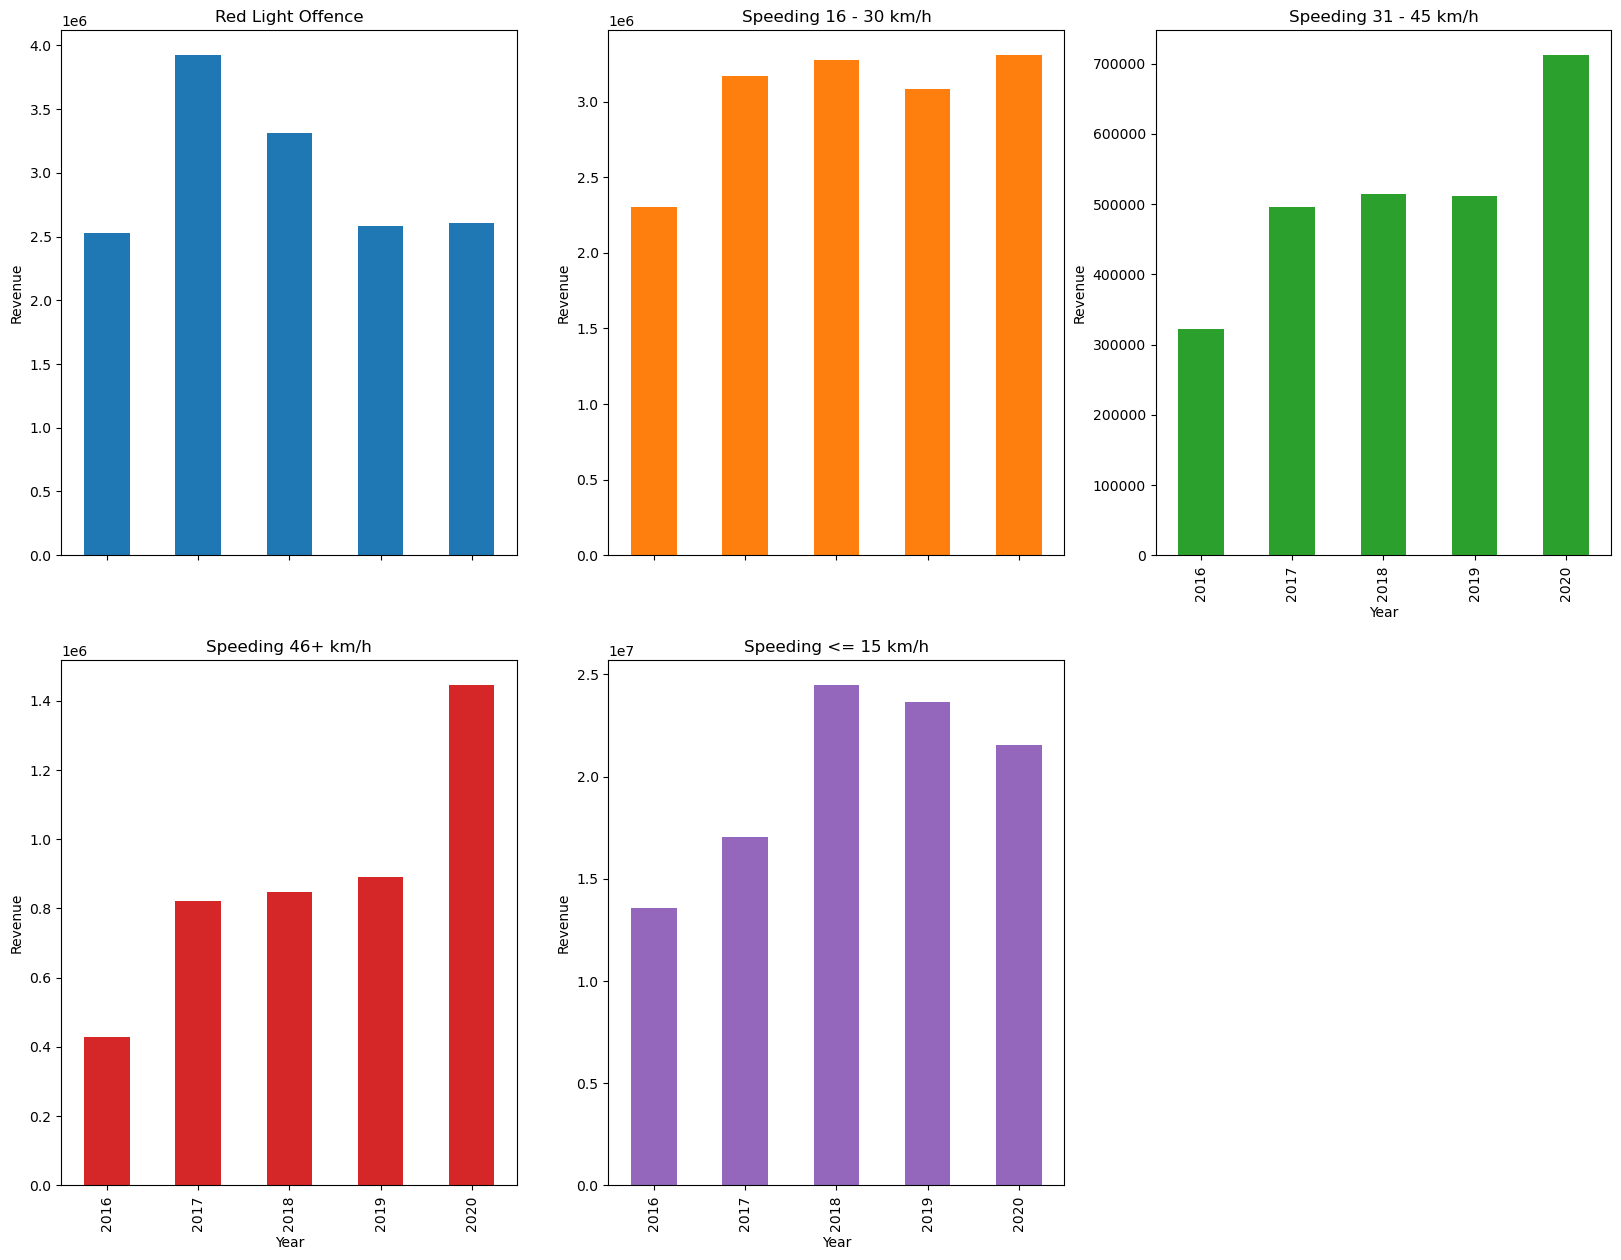

In [120]:
# plotting 
q2_df.plot(kind = 'bar', 
subplots = True, 
layout = [2,3], 
figsize = [20,15], 
ylabel = 'Revenue',
legend = '')

# also show table
q2_df

**Q2 Answer**

Revenue has increased for all kinds of speeding offences, while revenue for red light offences has remained stable, except for a spike in 2017-2018.

Higher range speeding (speeding above 30 - 45 km/h and 45 + km/h) have more than doubled since 2016, while mid-range speeding (+ 16-30 km/h) has increased by almost 50%.



These offences are caught at a rate of about one tenth of that of the Speeding <= 15 km/h, as depicted in the answer to Question 1.

## **Q3.**
**Are offences seasonal? Is there a similar pattern in total number of offences throughout each year?**

A good way to look into this is to build a line chart, with each year represented as a separate line, and the month on the x-axis.

In [121]:
# selecting required columns in dataframe
offences_q3 = offences[['Offence_Month','Sum_Inf_Count']]
# taking the month out of Date variable, to consolidate by year
offences_q3 = offences_q3.copy() # ensuring chained assignment does not occur in next task
offences_q3['Year'] = offences['Offence_Month'].str[0:4]
offences_q3['Month'] = offences['Offence_Month'].str[5:8]
offences_q3 = offences_q3.drop('Offence_Month', axis = 1)

offences_q3 = offences_q3.groupby(['Month','Year'],as_index = False).sum()

<ipython-input-1-35609c3a2214>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['January','February','March','April','May','June','July','August',


Year,2016,2017,2018,2019,2020
Month,,,,,
01,4201,4430,4133,4314,3643
02,4361,4389,6396,8710,4815
03,5057,5687,7237,4900,5604
04,4811,5065,6430,3936,3969
05,5626,4931,6949,5406,4667
06,5045,4818,6705,5570,4797
07,5145,5025,6688,6087,5729
08,5491,5112,6823,6097,5933
09,5008,5117,6224,5342,6050


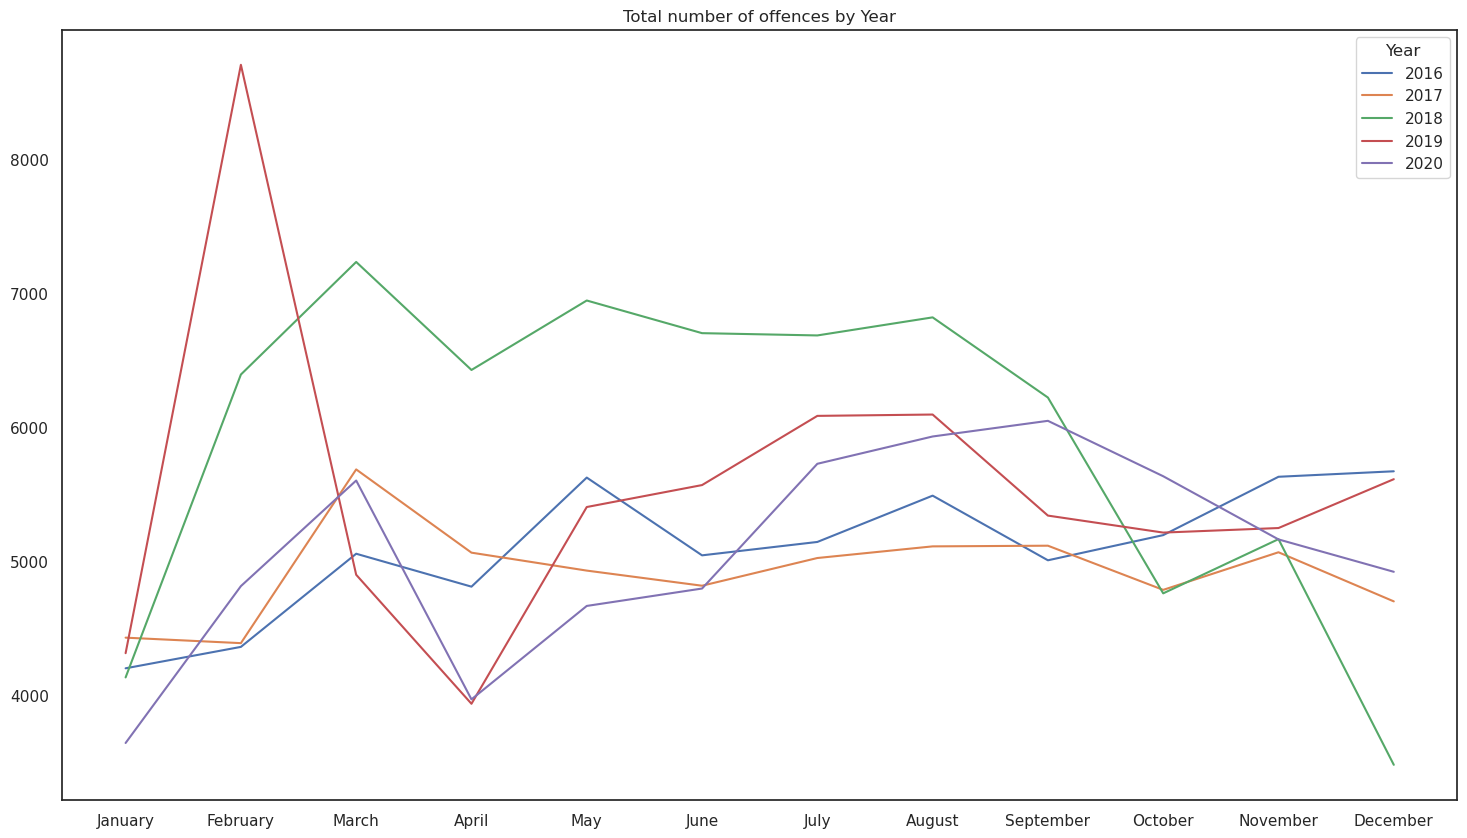

In [122]:
# plotting 
sns.set(rc={"figure.figsize":(18, 10)})
sns.set_style("white")
plot = sns.lineplot(data = offences_q3, x = 'Month', y = 'Sum_Inf_Count', hue = 'Year')
plot.set_xticklabels(['January','February','March','April','May','June','July','August',
'September','October','November','December'])
plot.set(xlabel='', ylabel='')
plot.set_title('Total number of offences by Year')

# also show table
q3_df = offences_q3.pivot_table(index = 'Month', columns = 'Year', values = 'Sum_Inf_Count', aggfunc = 'sum')
q3_df

**Q3 Answer**

While there does not appear to be seasonal periods where we see higher rates of offences, we can see  clearly that offences are lower in January and April in all years. This corresponds with the holiday periods, which is well-known to be accompanied with 'double demerits' - a traffic enforcement that aims to minimise road offences during busy holiday periods.


## **Q4.**
**Are the total number of fines and penalties from cameras increasing over time? Is there a difference between mobile speed cameras and other types?**

To answer this question, we can build a line chart that ranges from 2016 to 2020 with two lines, one containing mobile speed camera data, while the other aggregating the other types of offences.

In [123]:
# selecting required columns in dataframe
offences_q4 = offences[['Offence_Month','Camera_Type','Sum_Inf_Count']]

# show Camera_Type categories to rename
offences_q4['Camera_Type'].value_counts()

MOBILE SPEED CAMERA           35084
FIXED ONLY SPEED CAMERA       11779
RED LIGHT AND SPEED CAMERA    11305
POINT TO POINT CAMERA          1944
Name: Camera_Type, dtype: int64

In [124]:
# renaming categories
offences_q4 = offences_q4.copy() # ensuring chained assignment does not occur in next task
offences_q4['Camera_Type'] = offences_q4['Camera_Type'].str.replace('FIXED ONLY SPEED CAMERA','Other Camera',regex = True)
offences_q4['Camera_Type'] = offences_q4['Camera_Type'].str.replace('RED LIGHT AND SPEED CAMERA','Other Camera',regex = True)
offences_q4['Camera_Type'] = offences_q4['Camera_Type'].str.replace('POINT TO POINT CAMERA','Other Camera',regex = True)
offences_q4['Camera_Type'] = offences_q4['Camera_Type'].str.replace('MOBILE SPEED CAMERA','Mobile Speed Camera',regex = True)

# aggregating by month and type of camera
offences_q4 = offences_q4.groupby(['Offence_Month','Camera_Type'],as_index = False).sum()
offences_q4


,Offence_Month,Camera_Type,Sum_Inf_Count
0,2016-01,Mobile Speed Camera,831
1,2016-01,Other Camera,3370
2,2016-02,Mobile Speed Camera,1293
3,2016-02,Other Camera,3068
4,2016-03,Mobile Speed Camera,1425
...,...,...,...
115,2020-10,Other Camera,3007
116,2020-11,Mobile Speed Camera,2540
117,2020-11,Other Camera,2624
118,2020-12,Mobile Speed Camera,2049


To smooth out the trendline a little, let's group up the data into quarters.

In [125]:
# creating new columns separating strings in Offence_Month
offences_q4['Year'] = offences_q4['Offence_Month'].str[0:4]
offences_q4['Month'] = offences_q4['Offence_Month'].str[5:8].astype(int)

# defining function to use to link quarter
def convert_to_quarter(num):
    if num >= 1 and num <= 3:
        quarter = 'Q1'
    elif num >= 4 and num <= 6:
        quarter = 'Q2'
    elif num >= 7 and num <= 9:
        quarter = 'Q3'
    elif num >= 10 and num <= 12:
        quarter = 'Q4'
    return quarter

# create new column tagging the quarter that the month belongs in
offences_q4['Quarter'] = offences_q4.apply(lambda row: convert_to_quarter(row['Month']), axis = 1)
offences_q4['Quarter_Year'] = offences_q4['Year'] + '-' + offences_q4['Quarter']

# grouping by quarter, calculating the mean value for each quarter
offences_q4 = offences_q4.groupby(['Camera_Type','Quarter_Year'],as_index = False).mean().drop('Month', axis = 1)

Now before we plot it, we can also make trend lines for both Mobile Speed Camera and Other Cameras so we can observe the change a bit easier. Kumar (2020) provided me the underlying example for me to add trend lines into the plot.

In [126]:
q4_df = offences_q4.pivot_table(index = 'Quarter_Year',columns = 'Camera_Type', values = 'Sum_Inf_Count', aggfunc = 'sum')

# define arrays for trend line
msc_array = array(q4_df['Mobile Speed Camera'].tolist())
oc_array = array(q4_df['Other Camera'].tolist())

# get linear trend lines
time = arange(0,len(msc_array),1)
m1, b1 = polyfit(time,msc_array,1)
m2, b2 = polyfit(time,oc_array,1)

q4_df['Mobile Speed Camera Trend Line'] = m1*time+b1
q4_df['Other Camera Trend Line'] = m2*time+b2

<AxesSubplot:title={'center':'Total Number of Penalties 2016-2020'}, ylabel='Number of Penalties'>

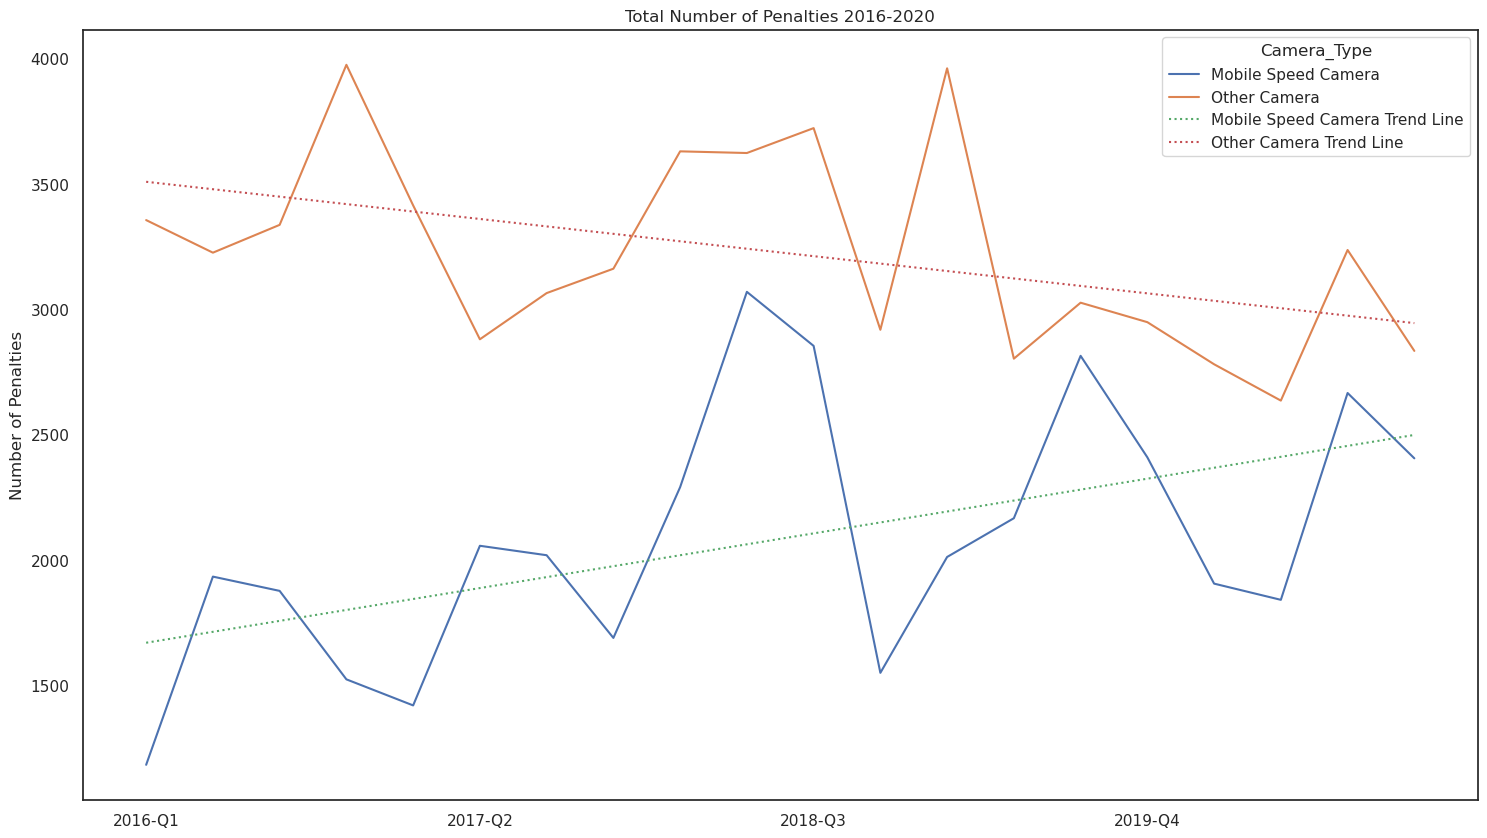

In [127]:
# plotting end dataframe
q4_df.plot(
    kind = 'line',
    style = ['-','-',':',":"],
    xlabel = '',
    ylabel = 'Number of Penalties',
    title = 'Total Number of Penalties 2016-2020'
    )

**Q4 Answer**

Having aggregated the monthly data into quarterly as well as adding in their linear trend lines, we can clearly see that over 2016 to 2020, the number of offences caught by mobile speed cameras are increasing, but is decreasing for all other types of camera.

This indicates that mobile speed camera enforcement is becoming a more successful method in penalising rule-bending drivers. 

However, we are yet to know if this increase is as a result of ACT Policing putting more resources into mobile speed camera enforcement. We will explore this in the next question.


## **Q5.**
**Is the use of mobile speed cameras increasing over time?**

The data in **msc_loc** contains mobile speed camera visits, with both date and time spent in hours at a site. We can aggregate the time spent by each day and display it in a line chart.

In [128]:
# select relevant columns
msc_loc_q5 = msc_loc[['Date','TimeAtSiteInHours']]
msc_loc_q5 = msc_loc_q5.groupby('Date').sum()

# group by month and calculate mean
msc_loc_q5['Year'] = msc_loc_q5.index.astype(str).str[0:4]
msc_loc_q5['Month'] = msc_loc_q5.index.astype(str).str[5:7]
msc_loc_q5['Month_Year'] = msc_loc_q5['Year'] + '-' + msc_loc_q5['Month']
msc_loc_q5 = msc_loc_q5.drop(['Year','Month'],axis = 1)
msc_loc_q5 = msc_loc_q5.groupby('Month_Year').mean()

# sorting rows in time series order, before converted month strings to actual month for subsequent chart
msc_loc_q5['MY_sort'] = msc_loc_q5.index
msc_loc_q5 = msc_loc_q5.sort_values(by = 'MY_sort',ascending = True)
msc_loc_q5 = msc_loc_q5.drop('MY_sort', axis = 1)

# converted month strings to actual month
msc_loc_q5['Year'] = msc_loc_q5.index.astype(str).str[0:4]
msc_loc_q5['Month'] = msc_loc_q5.index.astype(str).str[5:7]
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('01','Jan',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('02','Feb',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('03','Mar',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('04','Apr',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('05','May',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('06','Jun',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('07','Jul',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('08','Aug',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('09','Sep',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('10','Oct',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('11','Nov',regex = True)
msc_loc_q5['Month'] = msc_loc_q5['Month'].str.replace('12','Dec',regex = True)

# setting new date variable as index
msc_loc_q5['Month_Year'] = msc_loc_q5['Year'] + '-' + msc_loc_q5['Month']
msc_loc_q5 = msc_loc_q5.set_index('Month_Year')
msc_loc_q5 = msc_loc_q5.drop('Month', axis = 1)

# adding in trend line for chart
data_array = array(msc_loc_q5['TimeAtSiteInHours'].tolist())
time = arange(0,len(data_array),1)
m1, b1 = polyfit(time,data_array,1)

msc_loc_q5['Trend Line'] = m1*time+b1
msc_loc_q5

,TimeAtSiteInHours,Year,Trend Line
Month_Year,,,
2016-Jul,30.350000,2016,38.473889
2016-Aug,31.533548,2016,38.364717
2016-Sep,29.077667,2016,38.255545
2016-Oct,34.228710,2016,38.146372
2016-Nov,31.210000,2016,38.037200
2016-Dec,29.215000,2016,37.928028
2017-Jan,25.880000,2017,37.818855
2017-Feb,31.010000,2017,37.709683
2017-Mar,37.505806,2017,37.600511


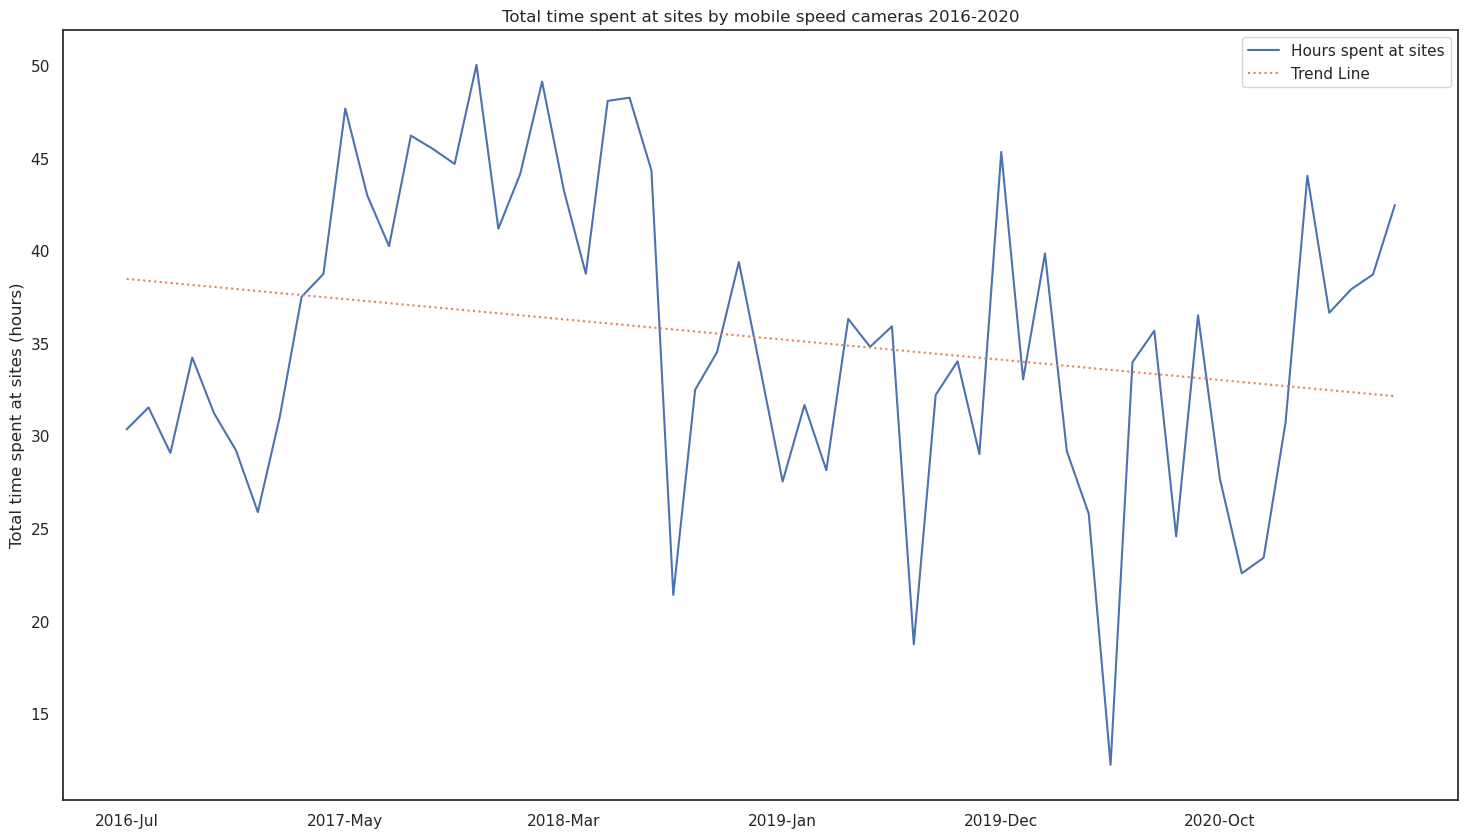

In [129]:
plot = msc_loc_q5.plot(
    kind = 'line',
    style = ['-',':'],
    xlabel = '',
    ylabel = 'Total time spent at sites (hours)',
    title = 'Total time spent at sites by mobile speed cameras 2016-2020'
)
plot.legend(['Hours spent at sites','Trend Line'])

**Q5 Answer**

The results here are quite interesting. Our initial hypothesis was that mobile speed camera enforcement is increasing over time, given the increase in the number of penalties witnessed in our answer for Q4. However, the results show that the number of hours spent enforcing mobile speed camera on the road is actually on a downward trend.

The time spent goes through a cycle of peaks and troughs, and also what appears to be an enforcement blast between May in 2017 and April 2018, when compared to the rest of the time period. Enforcement also appears to be increasing more recently, from the end of 2020 to the June 2021.


## **Q6.**
**Are mobile speed cameras placed in some locations more than others?**

Using our merged **msc_loc** datafile containing the latitude and longitudes of each of the mobile speed camera visits, we can map out the location of the visits and create a heat map. 

The Geopandas module allows us to work with shapefiles and create plots with variables that define map boundaries, such as latitudes and longitudes. Geopandas developers (2019) have provided detailed instruction on how their module works, which I have used to construct to following analysis.

We first have to start with loading the zip file that contains the shapefiles that we require.

In [130]:
# loading shapefile
zipfile = 'ACT_District.zip'
act_map = gpd.read_file(zipfile)
# selecting relevant columns
act_map = act_map[['DISTRICT_N','geometry']]
# reading to find out crs code of shapefile
act_map.crs

<Projected CRS: EPSG:28355>
Name: GDA94 / MGA zone 55
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Australia - onshore and offshore between 144°E and 150°E.
- bounds: (144.0, -50.89, 150.01, -9.23)
Coordinate Operation:
- name: Map Grid of Australia zone 55
- method: Transverse Mercator
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [131]:
# removing rows with NA in it, recall from Merging Data section.
msc_loc_q6 = msc_loc.dropna()

# selecting relevant columns
msc_loc_q6 = msc_loc_q6[['Date','TimeAtSiteInHours','LATITUDE','LONGITUDE']]

# creating geopandas dataframe from coordinates, and converting to crs of act_map geodataframe
msc_loc_q6 = gpd.GeoDataFrame(msc_loc_q6, geometry = 
gpd.points_from_xy(msc_loc_q6['LONGITUDE'],msc_loc_q6['LATITUDE']),crs = 4326)
msc_loc_q6 = msc_loc_q6.to_crs(epsg = 28355)

# select relevant columns
msc_loc_q6 = msc_loc_q6[['Date','TimeAtSiteInHours','geometry']]

msc_loc_q6

,Date,TimeAtSiteInHours,geometry
0,2016-07-01,1.23,POINT (690846.322 6102449.081)
1,2016-07-01,1.42,POINT (694475.753 6090653.225)
2,2016-07-01,1.25,POINT (696989.658 6083358.130)
3,2016-07-01,1.10,POINT (691640.270 6083909.943)
4,2016-07-01,1.02,POINT (689387.491 6078726.232)
...,...,...,...
46452,2021-06-15,1.33,POINT (684616.168 6100015.335)
46453,2021-06-01,1.33,POINT (684616.168 6100015.335)
46454,2021-06-17,1.33,POINT (684616.168 6100015.335)
46455,2021-06-21,1.33,POINT (684616.168 6100015.335)


Now that we've cleaned up the dataframe containing time at site in hours, we can conduct a spatial join on the geometry provided, to find the district that each site is in.

In [132]:
# joining msc_loc_q6, removing NAs and tagging the district it is in
spatialjoined = gpd.sjoin(msc_loc_q6,act_map, how = 'left', op = 'intersects')

We can now aggregate the data by each district.

In [133]:
#grouping and totalling hours in each district
spatialjoined = pd.DataFrame(spatialjoined)
hours_by_district = spatialjoined[['TimeAtSiteInHours','DISTRICT_N']].groupby('DISTRICT_N').sum()

hours_by_district

,TimeAtSiteInHours
DISTRICT_N,
BELCONNEN,12318.51
CANBERRA CENTRAL,16980.65
COREE,3.83
GUNGAHLIN,3691.46
HALL,75.87
JERRABOMBERRA,3031.29
KOWEN,396.42
MAJURA,2645.61
MOLONGLO VALLEY,1003.07


Now that we have a dataframe containing total number of hours spent on mobile speed cameras in each district, we can merge this with our geodataframe containing the polygon shape of the ACT, and define the districts with the highest number of hours by colour.

In [134]:
# merging hours_by_district into geodataframe to chart
act_map_counts = act_map.merge(hours_by_district, on = "DISTRICT_N", how = 'left')
act_map_counts['TimeAtSiteInHours'] = act_map_counts['TimeAtSiteInHours'].fillna(0)

<ipython-input-1-7e02a8dc3d30>:12: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  act_map_counts.apply(lambda act_map_counts: ax.annotate(s = act_map_counts['DISTRICT_N'].title(),


0          Annotation(685936, 6.09982e+06, 'Belconnen')
1              Annotation(684876, 6.04511e+06, 'Booth')
2     Annotation(693998, 6.09279e+06, 'Canberra Cent...
3              Annotation(673559, 6.09351e+06, 'Coree')
4       Annotation(666643, 6.06811e+06, 'Cotter River')
5          Annotation(694273, 6.10503e+06, 'Gungahlin')
6               Annotation(687759, 6.10639e+06, 'Hall')
7       Annotation(696431, 6.0844e+06, 'Jerrabomberra')
8              Annotation(710338, 6.09003e+06, 'Kowen')
9              Annotation(701020, 6.0942e+06, 'Majura')
10       Annotation(679554, 6.03104e+06, 'Mount Clear')
11      Annotation(678712, 6.07583e+06, 'Paddys River')
12    Annotation(675911, 6.04653e+06, 'Rendezvous Cr...
13           Annotation(680935, 6.09031e+06, 'Stromlo')
14           Annotation(679275, 6.06177e+06, 'Tennent')
15       Annotation(690470, 6.07423e+06, 'Tuggeranong')
16      Annotation(686281, 6.08724e+06, 'Weston Creek')
17       Annotation(690290, 6.0862e+06, 'Woden V

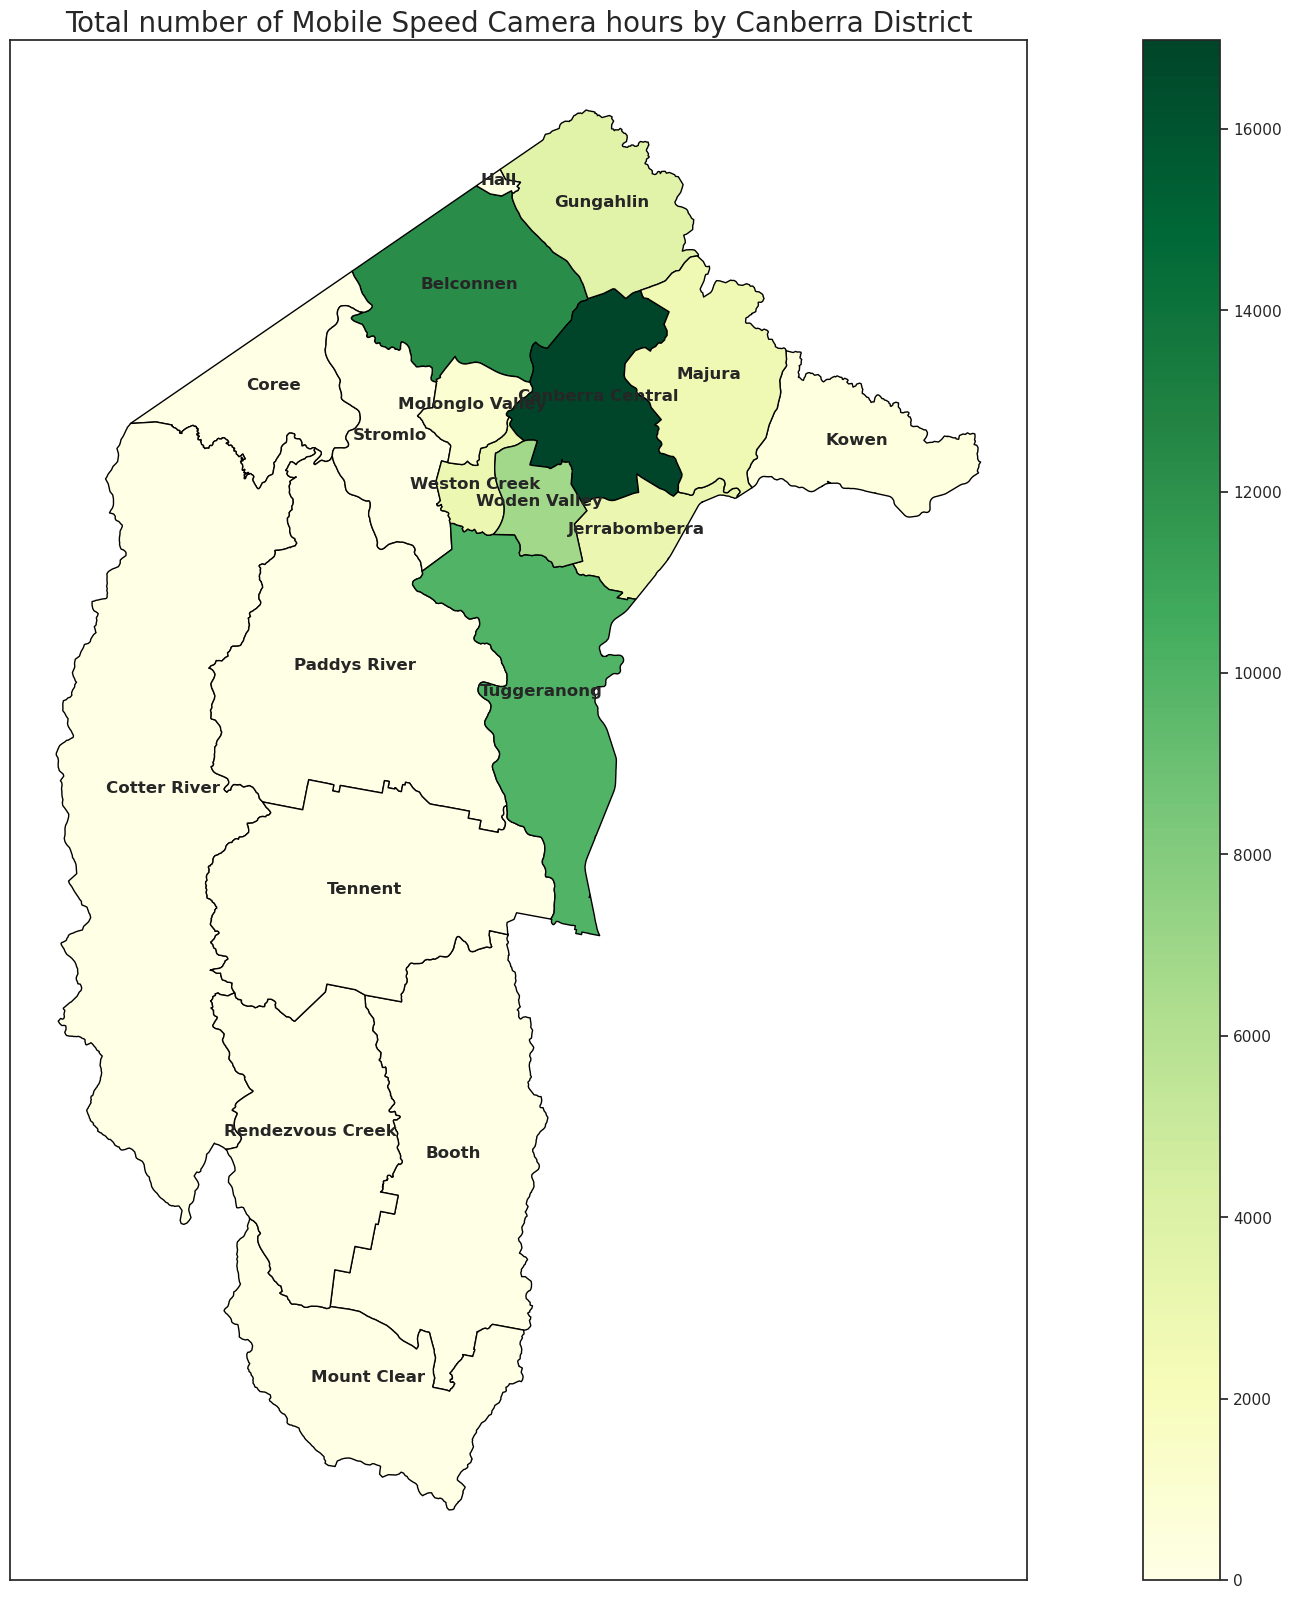

In [135]:
# charting
ax = act_map_counts.plot(column = 'TimeAtSiteInHours',
  cmap = 'YlGn',
  edgecolor = 'black',
  legend = True,
  figsize = [30,20])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Total number of Mobile Speed Camera hours by Canberra District', 
  fontsize = 20)
# annotate labels of districts on chart
act_map_counts.apply(lambda act_map_counts: ax.annotate(s = act_map_counts['DISTRICT_N'].title(), 
xy = act_map_counts['geometry'].centroid.coords[0], ha = 'center', fontsize = 12, weight = 'bold'),
axis = 1)

It would be good to track the trend of mobile speed camera enforcement hours by year. We can display it in several line charts.

We'll have to remove 2016 and 2021 from the data, as they do not contain a full year's worth of data. So we will be comparing 2017-2020.

In [136]:
# dropping 2016 and 2021 rows from dataframe
rows_2021 = msc_loc_q6[msc_loc_q6['Date'].dt.year == 2021].index
rows_2016 = msc_loc_q6[msc_loc_q6['Date'].dt.year == 2016].index
msc_loc_q6 = msc_loc_q6.sort_values('Date',ascending = True)
msc_loc_q6 = msc_loc_q6.drop(rows_2021)
msc_loc_q6 = msc_loc_q6.drop(rows_2016)

# joining msc_loc_q6, removing NAs and tagging the district it is in
spatialjoined = gpd.sjoin(msc_loc_q6,act_map, how = 'left', op = 'intersects')

# grouping data by year
spatialjoined['Day'] = spatialjoined['Date'].astype(str)
spatialjoined['Year'] = spatialjoined['Day'].str[0:4]
spatialjoined = spatialjoined.drop(['Day','Date','geometry','index_right'],axis = 1)

# turn back to dataframe in order to pivot table and turn data to usable shape
year_df = pd.DataFrame(spatialjoined)
year_df = year_df.pivot_table(index = 'DISTRICT_N',columns = 'Year', values = 'TimeAtSiteInHours', aggfunc = 'sum')
year_df = year_df.fillna(0)
year_df.index = year_df.index.str.title()

# displaying yearly data.
year_df

Year,2017,2018,2019,2020
DISTRICT_N,,,,
Belconnen,2850.00,2859.03,2166.69,1936.78
Canberra Central,4081.71,4128.85,2868.08,2418.11
Coree,1.25,0.00,2.58,0.00
Gungahlin,924.38,786.50,623.96,605.42
Hall,26.64,26.38,18.65,0.00
Jerrabomberra,754.21,711.80,561.47,446.55
Kowen,86.77,122.16,71.54,61.00
Majura,525.23,711.33,553.96,424.53
Molonglo Valley,192.20,151.26,197.85,244.92


Let's now compare the top 10 districts, based on their 2020 total figures to see if how the number of hours spent on mobile speed camera is changing within them.

array([[<AxesSubplot:xlabel='Year', ylabel='Total Hours'>,
        <AxesSubplot:xlabel='Year', ylabel='Total Hours'>],
       [<AxesSubplot:xlabel='Year', ylabel='Total Hours'>,
        <AxesSubplot:xlabel='Year', ylabel='Total Hours'>],
       [<AxesSubplot:xlabel='Year', ylabel='Total Hours'>,
        <AxesSubplot:xlabel='Year', ylabel='Total Hours'>],
       [<AxesSubplot:xlabel='Year', ylabel='Total Hours'>,
        <AxesSubplot:xlabel='Year', ylabel='Total Hours'>],
       [<AxesSubplot:xlabel='Year', ylabel='Total Hours'>,
        <AxesSubplot:xlabel='Year', ylabel='Total Hours'>]], dtype=object)

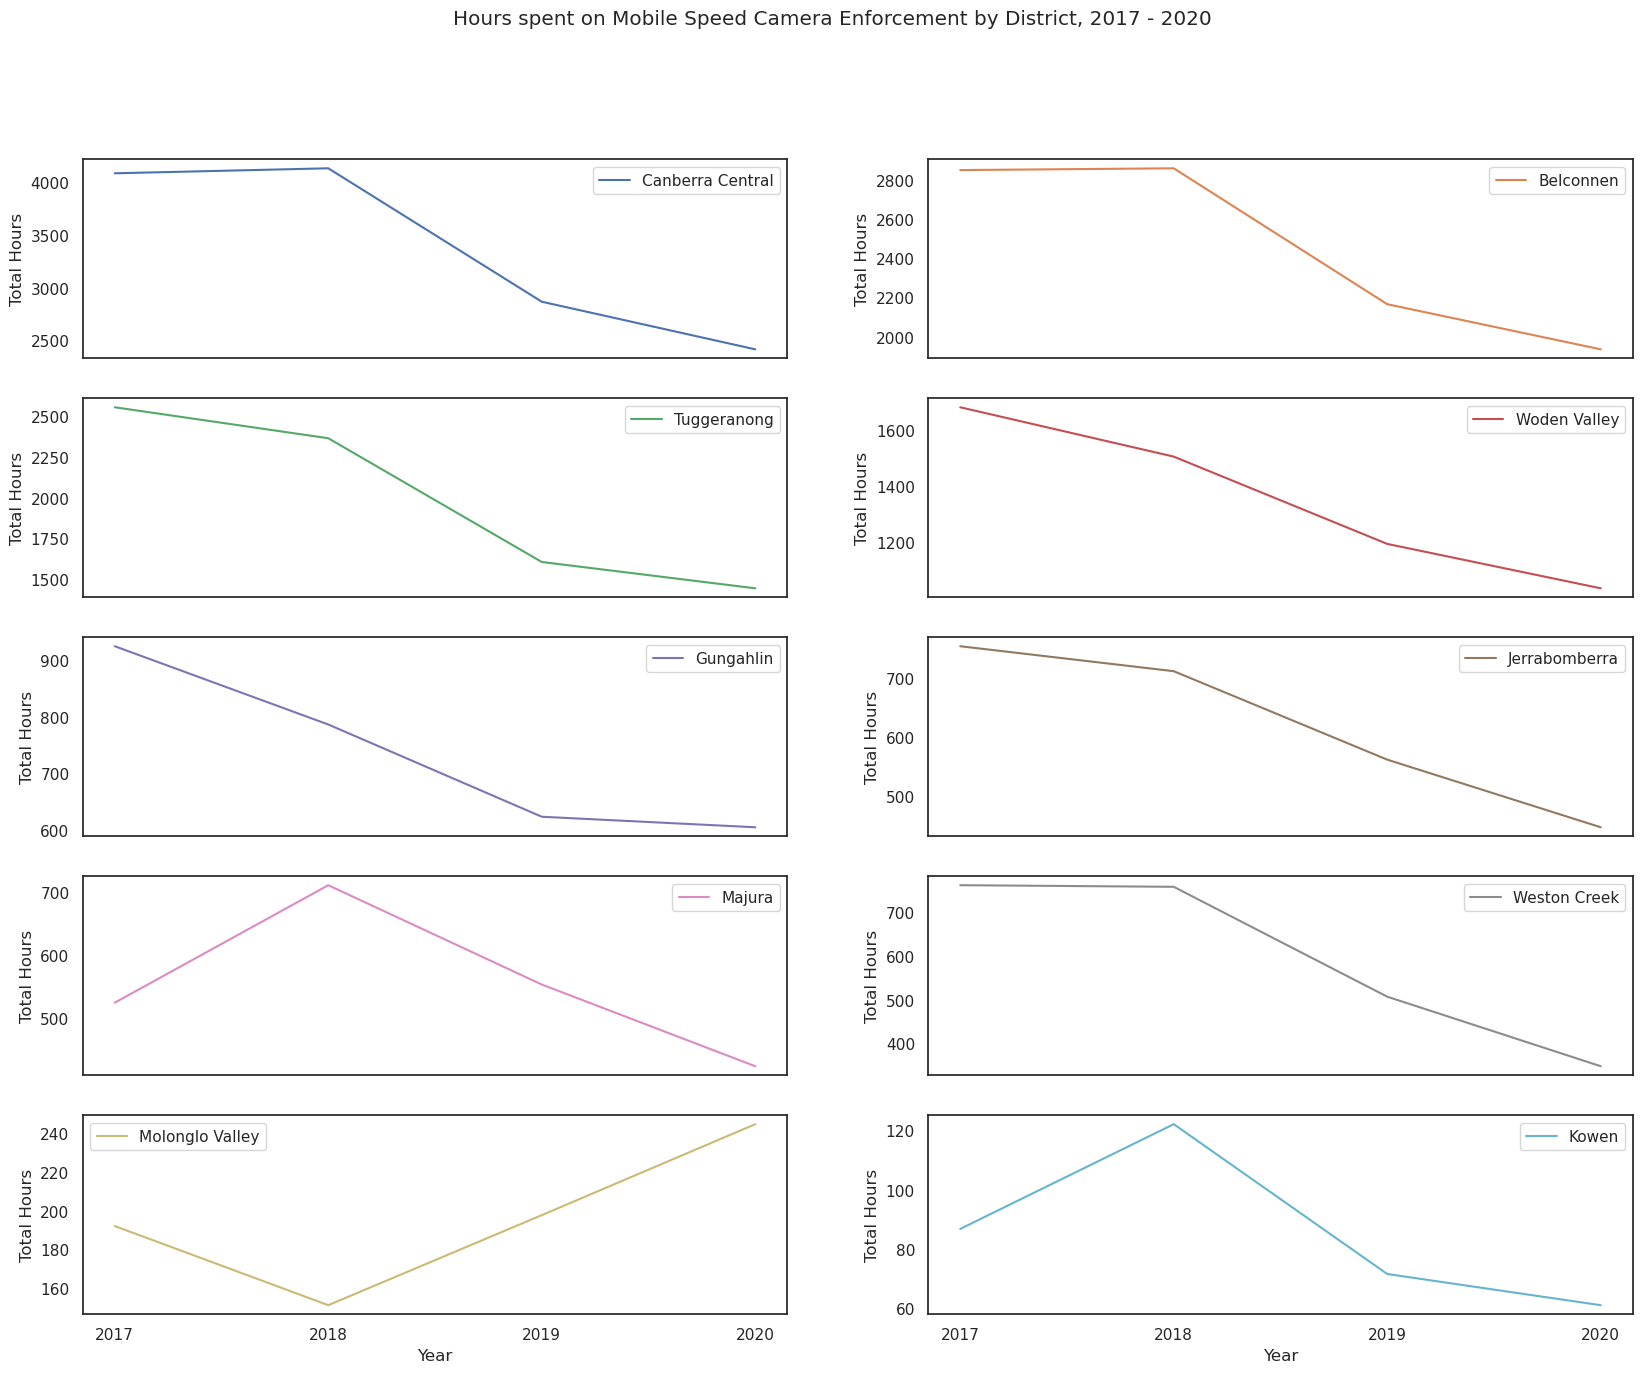

In [137]:
# organising dataframe, showing only top 10 based on 2020 figures, and transposing to develop chart.
year_df = year_df.sort_values('2020', ascending = False)
year_df = year_df.head(10)
year_df = year_df.transpose()

#plotting
year_df.plot(
    kind = 'line',
    subplots = True,
    layout = [5,2], 
    figsize = [20,15],
    title = 'Hours spent on Mobile Speed Camera Enforcement by District, 2017 - 2020',
    ylabel = 'Total Hours',
)

**Q6 Answer**

 Our map of Canberra shows that through the time period of the dataset, (Mid 2016 to Mid 2021), the most heavily enforced area in Canberra is Canberra Central. 
 
However, our secondary chart showing the number of hours spent in each district over time (2017 - 2020) show that for almost all districts, the number of hours spent has actually decreased over time. The only exception to this is Molonglo valley, which, compared to other locations, has a significantly lower rate of enforcement given the low values. Enforcement in the Molonglo Valley has increased to around 240 total hours in 2020.

# **5. Conclusion and Discussion**

The results of the analysis show that the most common type of offence caught by cameras is speeding at the rate of less than 15 kilometres per hour. This comes as no surpise, as it is very likely that the majority of these cases are simply 'accidents', from typically conscientious drivers who were caught out over the speed limit at that particular moment in time. However, there is no excuse for speeding, and these offences usually serve as an important reminder for them to remain attentive to the speed that they're travelling at.

However, it is interesting to see that speeding revenue (at any rate) has been increasing since 2016 as answered in Question 2, while the total number of hours spent on mobile speed camera enforcement is actually decreasing, as seen in Question 5. This data further de-bunks the myth that mobile speed cameras are deliberately placed in specific locations with the main purpose of revenue raising. If this was the case, then we should be seeing an increase in the total number of hours spent on mobile speed camera visits, along-side the increasing penalties (as seen in Question 4) and increasing revenues.

Question 3 shows that there are significantly less number of offences during holiday seasons, where the penalty for any traffic infringement is significantly higher. Drivers are usually more conscientious of their driving behaviour during this period. In Canberra, it is widely advertised prior to each holiday season that 'double-demerits' will apply. The demerit point is a system where when one accumulates enough demerit points, they would automatically lose their licence for a given amount of time, therefore unable to drive. Police presence is also likely higher during these holiday seasons.

Finally, Question 6 shows that the use of mobile speed camera is decreasing in almost all districts in Canberra from 2016. The only increase is seen in Molonglo Valley, which is only a minor district compared to the most highly monitored locations such as Canberra Central, Belconnen and Tuggeranong. 

If one were to argue that mobile speed cameras are used for revenue raising, they would be shocked to know that mobile speed camera use is actually decreasing, while offences and revenue is increasing.

# **6. Future Analysis**

The broader discourse around the purpose of traffic enforcement and speed cameras is to reduce the number of injuries, fatalities and traffic incidents on roads. Despite being fun and interesting, it is almost a trivial matter, next to this, for one to disprove that the main purpose of mobile speed camera use is for revenue raising. 

The data provided by ACT Open Data can be very useful (better if it was less messy) for lots of different kinds of future research. For example, we can analyse the offences, and mobile speed camera visits dataset against a road crash dataset provided [here](https://www.data.act.gov.au/Transport/ACT-Road-Crash-Data/6jn4-m8rx) to examine the effectiveness of camera use on reduction of road incidents. This may or may not support the research done by Tay (2010). The locations variables in all datasets can also be used and analysed, to find more appropriate positions to place mobile speed cameras.

An increasing number of offences each year may be both a good and bad scenario depending on how you look at it, but an increasing number of road incidents can only be a bad situation.

# **7. References**



ACT Government, 2021, 'Complete Land Administration Database', ACTmapi, viewed 5 August 2021, <<https://www.actmapi.act.gov.au/download.html>>

ACT Government, 2021, Mobile Speed Cameras in Canberra', electronic dataset, Open Data Portal dataACT, viewed 5 August 2021, <<https://www.data.act.gov.au/Transport/Mobile-speed-cameras-in-Canberra/j8sw-butu>>

ACT Government, 2021, 'Mobile Speed Camera Visits and Stays', electronic dataset, Open Data Portal dataACT, viewed 5 August 2021, <<https://www.data.act.gov.au/Transport/Mobile-Speed-Camera-Visits-and-Stays/d56a-2nhi/data>>

ACT Government, 2021, 'Traffic Speed Camera Locations', electronic dataset, Open Data Portal dataACT, viewed 5 August 2021, <https://www.data.act.gov.au/Justice-Safety-and-Emergency/Traffic-speed-camera-locations/426s-vdu4/data>

GeoPandas developers 2019, *Managing Projections*, Geopandas, viewed 8 August 2021, <<https://geopandas.org/gallery/plotting_with_geoplot.html>>

GeoPandas developers 2019, *Merging Data*, Geopandas, viewed 8 August 2021, <<https://geopandas.org/docs/user_guide/mergingdata.html>>

GeoPandas developers 2019, *Plotting with Geoplot and GeoPandas*, Geopandas, viewed 7 August 2021, <<https://geopandas.org/docs/user_guide/projections.html>>

Kumar, A 2020, 'Python: How to add a Trend Line to a Line Chart/Graph', *DZone*, 30 October 2020, viewed 7 August 2021, <<https://dzone.com/articles/python-how-to-add-trend-line-to-line-chartgraph>>

Manheim, M 2021, 'Canberrans wrongly believe mobile speed camera exist to raise revenue. This is how they're really used', *abc news*, 5 April 2021, viewed 7 August 2021, <<https://www.abc.net.au/news/2021-04-05/act-speed-cameras-as-revenue-raisers/100037994>>  

Tay, R 2010, 'Speed Cameras Improving Safety or Raising Revenue?', *Journal of Transport Economics and Policy*, vol. 44, no. 2, pp. 247 - 257.